In [1]:
import matplotlib.pyplot as plt
import holoviews as hv
import hvplot
import hvplot.pandas
import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import json
import time
from config import api_key
from scipy.stats import linregress
from pprint import pprint

In [2]:
artist = 'TimMcGraw'
locale = 'en-us'
segment = 'Music'

events = requests.get(f'https://app.ticketmaster.com/discovery/v2/events.json?keyword={artist}&segment={segment}&apikey={api_key}').json()

In [9]:
#open('test_output.json', 'w').write(json.dumps(events, indent=4))

In [3]:
# Create empty lists for each column
artist = []
date = []
city = []
state = []
country_list = []
min_price = []
max_price = []
latitude = []
longitude = []

for x in events['_embedded']['events']:
    
    artist_name = x['name']
    event_date = x['dates']['start']['localDate']
    event_city = x['_embedded']['venues'][0]['city']['name']
    country = x['_embedded']['venues'][0]['country']['countryCode']
    lat = x['_embedded']['venues'][0]['location']['latitude']
    long = x['_embedded']['venues'][0]['location']['longitude']

    artist.append(artist_name)
    date.append(event_date)
    city.append(event_city)
    country_list.append(country)
    
    if 'state' in x['_embedded']['venues'][0]:
        state.append(x['_embedded']['venues'][0]['state']['stateCode'])
    else:
        state.append(None)

    latitude.append(lat)
    longitude.append(long)

    if 'priceRanges' in x:
        min_price.append(x['priceRanges'][0]['min'])
        max_price.append(x['priceRanges'][0]['max'])
    else:
        min_price.append(None)
        max_price.append(None)

# Create the DataFrame using the lists
tm_events_df = pd.DataFrame({
    'Artist & Tour': artist,
    'Date': date,
    'City': city,
    'State': state,
    'Country': country_list,
    'Min Price': min_price,
    'Max Price': max_price,
    'Lat': latitude,
    'Lon': longitude
})

# Display the DataFrame
tm_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
0,Tim McGraw: Standing Room Only Tour 2024,2024-04-20,Saint Paul,MN,US,34.50,1034.50,44.94489438,-93.10121819
1,Tim McGraw: Standing Room Only Tour 2024,2024-03-15,Tampa,FL,US,35.75,215.75,27.942743,-82.451772
2,Tim McGraw: Standing Room Only Tour 2024,2024-03-29,Seattle,WA,US,39.50,219.50,47.6221261,-122.35401604
3,Tim McGraw: Standing Room Only Tour 2024,2024-04-04,Denver,CO,US,39.50,219.50,39.74724,-105.010166
4,Tim McGraw: Standing Room Only Tour 2024,2024-03-16,Orlando,FL,US,35.50,215.00,28.539293,-81.383957
5,Tim McGraw: Standing Room Only Tour 2024,2024-06-01,Grand Rapids,MI,US,39.50,219.50,42.962098,-85.67158
6,Tim McGraw: Standing Room Only Tour 2024,2024-03-30,Eugene,OR,US,39.50,1039.50,44.044972,-123.066824
7,Tim McGraw: Standing Room Only Tour 2024,2024-04-19,Milwaukee,WI,US,34.50,214.50,43.04228,-87.916896
8,Tim McGraw: Standing Room Only Tour 2024,2024-06-27,Phoenix,AZ,US,34.50,214.50,33.445899,-112.071313
9,Tim McGraw: Standing Room Only Tour 2024,2024-04-25,Nashville,TN,US,34.15,212.50,36.159949,-86.77857


In [4]:
tm_events_df = tm_events_df.loc[tm_events_df["Country"] == "US"]

In [5]:
tm_events_df = tm_events_df.astype({
    "Artist & Tour": str,
    "Date": str,
    "City": str,
    "State": str,
    "Country": str,
    "Min Price": float,
    "Max Price": float,
    "Lat": float,
    "Lon": float
})

In [6]:
tm_events_df = tm_events_df.sort_values("Date")
tm_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
15,Tim McGraw: Standing Room Only Tour 2024,2024-03-14,Jacksonville,FL,US,36.41,186.42,30.325811,-81.645058
1,Tim McGraw: Standing Room Only Tour 2024,2024-03-15,Tampa,FL,US,35.75,215.75,27.942743,-82.451772
4,Tim McGraw: Standing Room Only Tour 2024,2024-03-16,Orlando,FL,US,35.50,215.00,28.539293,-81.383957
2,Tim McGraw: Standing Room Only Tour 2024,2024-03-29,Seattle,WA,US,39.50,219.50,47.622126,-122.354016
6,Tim McGraw: Standing Room Only Tour 2024,2024-03-30,Eugene,OR,US,39.50,1039.50,44.044972,-123.066824
3,Tim McGraw: Standing Room Only Tour 2024,2024-04-04,Denver,CO,US,39.50,219.50,39.747240,-105.010166
14,Tim McGraw: Standing Room Only Tour 2024,2024-04-06,Boise,ID,US,36.50,215.00,43.603580,-116.199107
7,Tim McGraw: Standing Room Only Tour 2024,2024-04-19,Milwaukee,WI,US,34.50,214.50,43.042280,-87.916896
0,Tim McGraw: Standing Room Only Tour 2024,2024-04-20,Saint Paul,MN,US,34.50,1034.50,44.944894,-93.101218
9,Tim McGraw: Standing Room Only Tour 2024,2024-04-25,Nashville,TN,US,34.15,212.50,36.159949,-86.778570


In [7]:
tm_events_df.to_csv('TimMcGraw.csv')

In [8]:
tm_events_df.to_excel('TimMcGraw.xlsx')

In [8]:
tm_events_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 6 to 1
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Artist & Tour  11 non-null     object 
 1   Date           11 non-null     object 
 2   City           11 non-null     object 
 3   State          11 non-null     object 
 4   Country        11 non-null     object 
 5   Min Price      10 non-null     float64
 6   Max Price      10 non-null     float64
 7   Lat            11 non-null     float64
 8   Lon            11 non-null     float64
dtypes: float64(4), object(5)
memory usage: 880.0+ bytes


In [9]:
# Configure the map plot
map_plot = tm_events_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    color = "City",
    frame_width = 800,
    frame_height = 600
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City)

In [10]:
bar_tm_events_df = pd.DataFrame({
    'Artist & Tour': artist,
    'City': city,
    "Country": country_list,
    'Min Price': min_price,
    'Max Price': max_price
})

# Display the DataFrame
bar_tm_events_df

,Artist & Tour,City,Country,Min Price,Max Price
0,Tim McGraw: Standing Room Only Tour 2024,Saint Paul,US,34.50,1034.50
1,Tim McGraw: Standing Room Only Tour 2024,Tampa,US,35.75,215.75
2,Tim McGraw: Standing Room Only Tour 2024,Seattle,US,39.50,219.50
3,Tim McGraw: Standing Room Only Tour 2024,Denver,US,39.50,219.50
4,Tim McGraw: Standing Room Only Tour 2024,Orlando,US,35.50,215.00
5,Tim McGraw: Standing Room Only Tour 2024,Grand Rapids,US,39.50,219.50
6,Tim McGraw: Standing Room Only Tour 2024,Eugene,US,39.50,1039.50
7,Tim McGraw: Standing Room Only Tour 2024,Milwaukee,US,34.50,214.50
8,Tim McGraw: Standing Room Only Tour 2024,Phoenix,US,34.50,214.50
9,Tim McGraw: Standing Room Only Tour 2024,Nashville,US,34.15,212.50


In [11]:
# Drop any rows with null values
bar_tm_clean = bar_tm_events_df.dropna()

# Display sample data
bar_tm_clean

,Artist & Tour,City,Country,Min Price,Max Price
0,Tim McGraw: Standing Room Only Tour 2024,Saint Paul,US,34.50,1034.50
1,Tim McGraw: Standing Room Only Tour 2024,Tampa,US,35.75,215.75
2,Tim McGraw: Standing Room Only Tour 2024,Seattle,US,39.50,219.50
3,Tim McGraw: Standing Room Only Tour 2024,Denver,US,39.50,219.50
4,Tim McGraw: Standing Room Only Tour 2024,Orlando,US,35.50,215.00
5,Tim McGraw: Standing Room Only Tour 2024,Grand Rapids,US,39.50,219.50
6,Tim McGraw: Standing Room Only Tour 2024,Eugene,US,39.50,1039.50
7,Tim McGraw: Standing Room Only Tour 2024,Milwaukee,US,34.50,214.50
8,Tim McGraw: Standing Room Only Tour 2024,Phoenix,US,34.50,214.50
9,Tim McGraw: Standing Room Only Tour 2024,Nashville,US,34.15,212.50


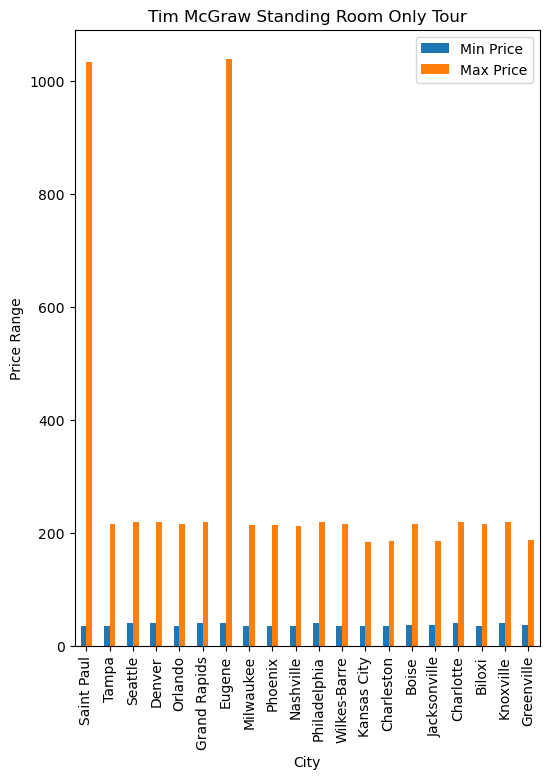

<Figure size 640x480 with 0 Axes>

In [17]:
# Create a bar chart 
max_chart = bar_tm_clean.plot(kind='bar', figsize=(6,8))
#plt.bar(x_values='City',y_values='Max Price',)
#bar_tm_clean.set_index("City", inplace=True)

# Add labels
plt.xlabel('City')
plt.ylabel('Price Range')
plt.title('Tim McGraw Standing Room Only Tour')

#bar_tm_clean.set_index("city", inplace=True)
plt.savefig("output_data/FigTM.png")

plt.show()
plt.tight_layout()